In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train_data.csv")
df

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [3]:
df.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

The Data is about the potential insurance customers. It has the following features 
- 'ID'                     : a serial number assigned to a customer
- 'City_Code'              : code of the city individual/joint account holders is living.
- 'Region_Code'            : code of region
- 'Accomodation_Type'      : the type of their residence. (Rented/owned)
- 'Reco_Insurance_Type'    : the type of insurance they had. (joint / individual)
- 'Upper_Age'              : Max age amoung the joint account holders. (if individual, upper_age = lower_age)
- 'Lower_Age'              : Min age among the joint account holders.
- 'Is_Spouse'              : For joint policy, whether the other person is spouse or not.
- 'Health Indicator'       : Some domain specific health indication
- 'Holding_Policy_Duration': the duration of policy the customer is using
- 'Holding_Policy_Type'    : the type of policy selected
- 'Reco_Policy_Cat'        : Recovered policy category, domain specific.
- 'Reco_Policy_Premium'    : Recovered policy premium.
- 'Response'               : Response given by customer at the end. 1 = accepting to take new policy, 0 = not willing to take. 

In [13]:
#Removing ID and region since there are many unique values in each. 
df['Region_Code'].value_counts()

1       96
5       75
2       73
6       73
4       73
        ..
5859     1
5412     1
5380     1
5795     1
5638     1
Name: Region_Code, Length: 5316, dtype: int64

In [14]:
df1 = df.drop(['ID', 'Region_Code'], axis = 1)

In [15]:
df1.isnull().sum()

City_Code                      0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [16]:
df1 = df1.replace({'Holding_Policy_Duration' : { np.nan: 0, '14+' : 15}})
df1['Holding_Policy_Type'] = df1['Holding_Policy_Type'].replace(np.nan, 0)
df1['Health Indicator'] = df1['Health Indicator'].replace(np.nan, "X10")

In [17]:
df1

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,Rented,Individual,36,36,No,X1,15,3.0,22,11628.0,0
1,C5,Owned,Joint,75,22,No,X2,0,0.0,22,30510.0,0
2,C5,Owned,Individual,32,32,No,X10,1.0,1.0,19,7450.0,1
3,C24,Owned,Joint,52,48,No,X1,15,3.0,19,17780.0,0
4,C8,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,Rented,Individual,22,22,No,X3,0,0.0,18,7704.0,0
50878,C5,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,C1,Rented,Individual,63,63,No,X2,15,1.0,12,11374.0,0
50880,C1,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


# Univariate Analysis

In [18]:
#plt.boxplot(df1['Reco_Policy_Premium'], patch_artist = True)
df1['Reco_Policy_Premium'].describe()

count    50882.000000
mean     14183.950069
std       6590.074873
min       2280.000000
25%       9248.000000
50%      13178.000000
75%      18096.000000
max      43350.400000
Name: Reco_Policy_Premium, dtype: float64

In [19]:
df1.dtypes

City_Code                   object
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [20]:
df1.describe()

,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,44.856275,42.738866,1.468417,15.115188,14183.950069,0.239947
std,17.310271,17.319375,1.434988,6.340663,6590.074873,0.427055
min,18.000000,16.000000,0.000000,1.000000,2280.000000,0.000000
25%,28.000000,27.000000,0.000000,12.000000,9248.000000,0.000000
50%,44.000000,40.000000,1.000000,17.000000,13178.000000,0.000000
75%,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [21]:
df1.corr(method='spearman')

,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Upper_Age,1.000000,0.909629,0.318290,0.024441,0.835294,0.004385
Lower_Age,0.909629,1.000000,0.287866,0.021338,0.669743,-0.000472
Holding_Policy_Type,0.318290,0.287866,1.000000,0.050934,0.265066,0.005052
Reco_Policy_Cat,0.024441,0.021338,0.050934,1.000000,0.061397,0.092954
Reco_Policy_Premium,0.835294,0.669743,0.265066,0.061397,1.000000,0.007918
Response,0.004385,-0.000472,0.005052,0.092954,0.007918,1.000000


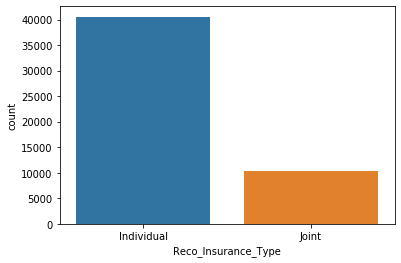

In [22]:
sns.countplot('Reco_Insurance_Type', data = df1)

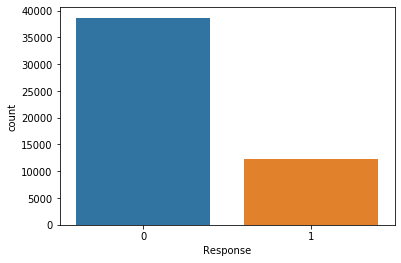

In [38]:
sns.countplot('Response', data = df1)

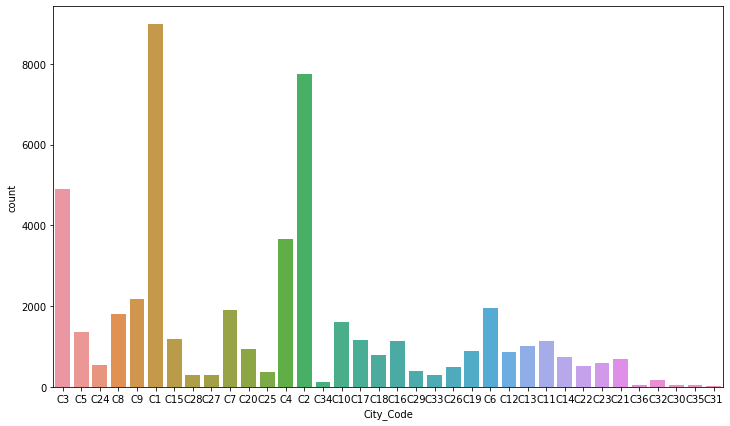

In [23]:
countplt, ax = plt.subplots(figsize = (12,7))
ax =sns.countplot(x = 'City_Code', data=df1)

The policies after 15 are which shown a signficant response.

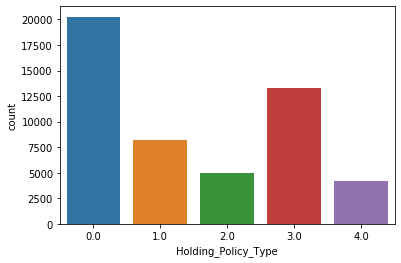

In [24]:
sns.countplot('Holding_Policy_Type', data = df1)

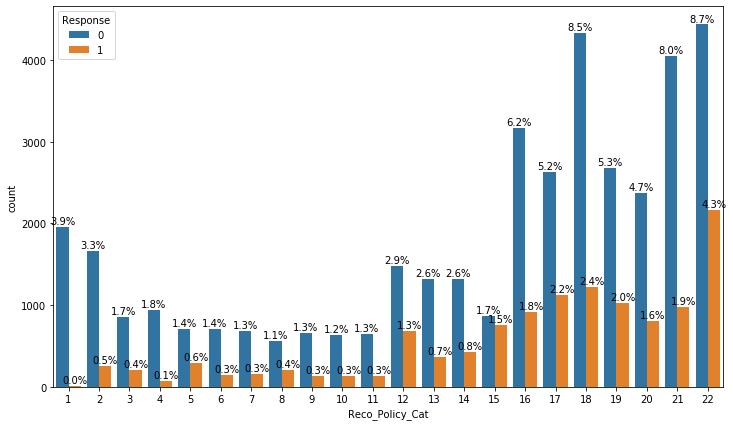

In [25]:
fig, ax = plt.subplots(figsize = (12,7))

ax= sns.countplot('Reco_Policy_Cat', data = df1, hue= 'Response')
total = len(df1)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

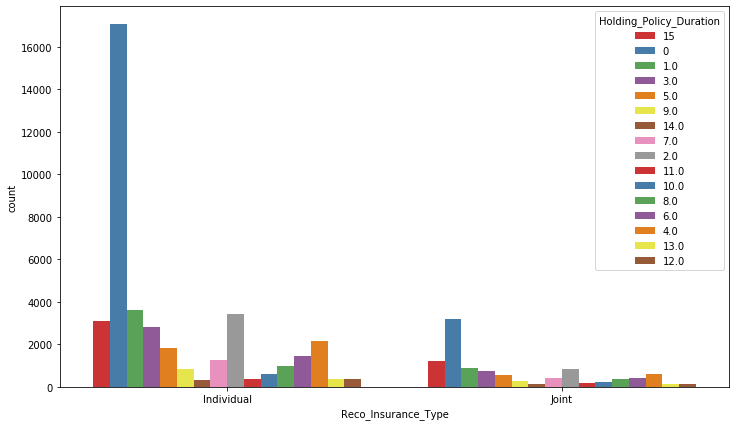

In [26]:
fig,ax = plt.subplots(figsize= (12,7))

ax = sns.countplot('Reco_Insurance_Type', data = df1, hue= 'Holding_Policy_Duration', palette='Set1')

From above graph, the data is more inclined to the newly joined customers. Or this could be due to the lack of the data collection properly. 

It seems that, the data of 2 years of holding policy is more compared to other years.

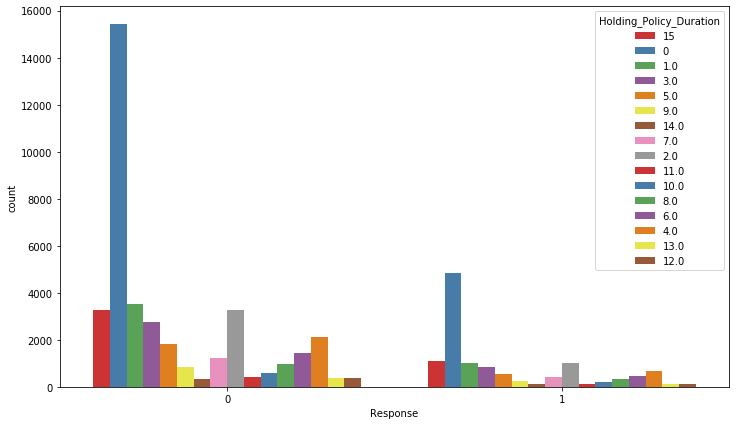

In [27]:
fig,ax = plt.subplots(figsize= (12,7))

ax = sns.countplot('Response', data = df1, hue= 'Holding_Policy_Duration', palette='Set1')

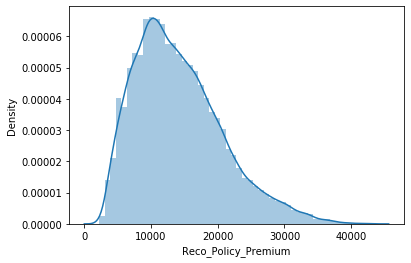

In [28]:
sns.distplot(df1['Reco_Policy_Premium'])

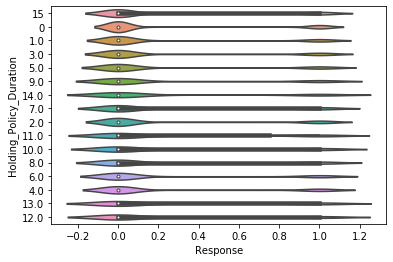

In [29]:
sns.violinplot('Response','Holding_Policy_Duration', data= df1)

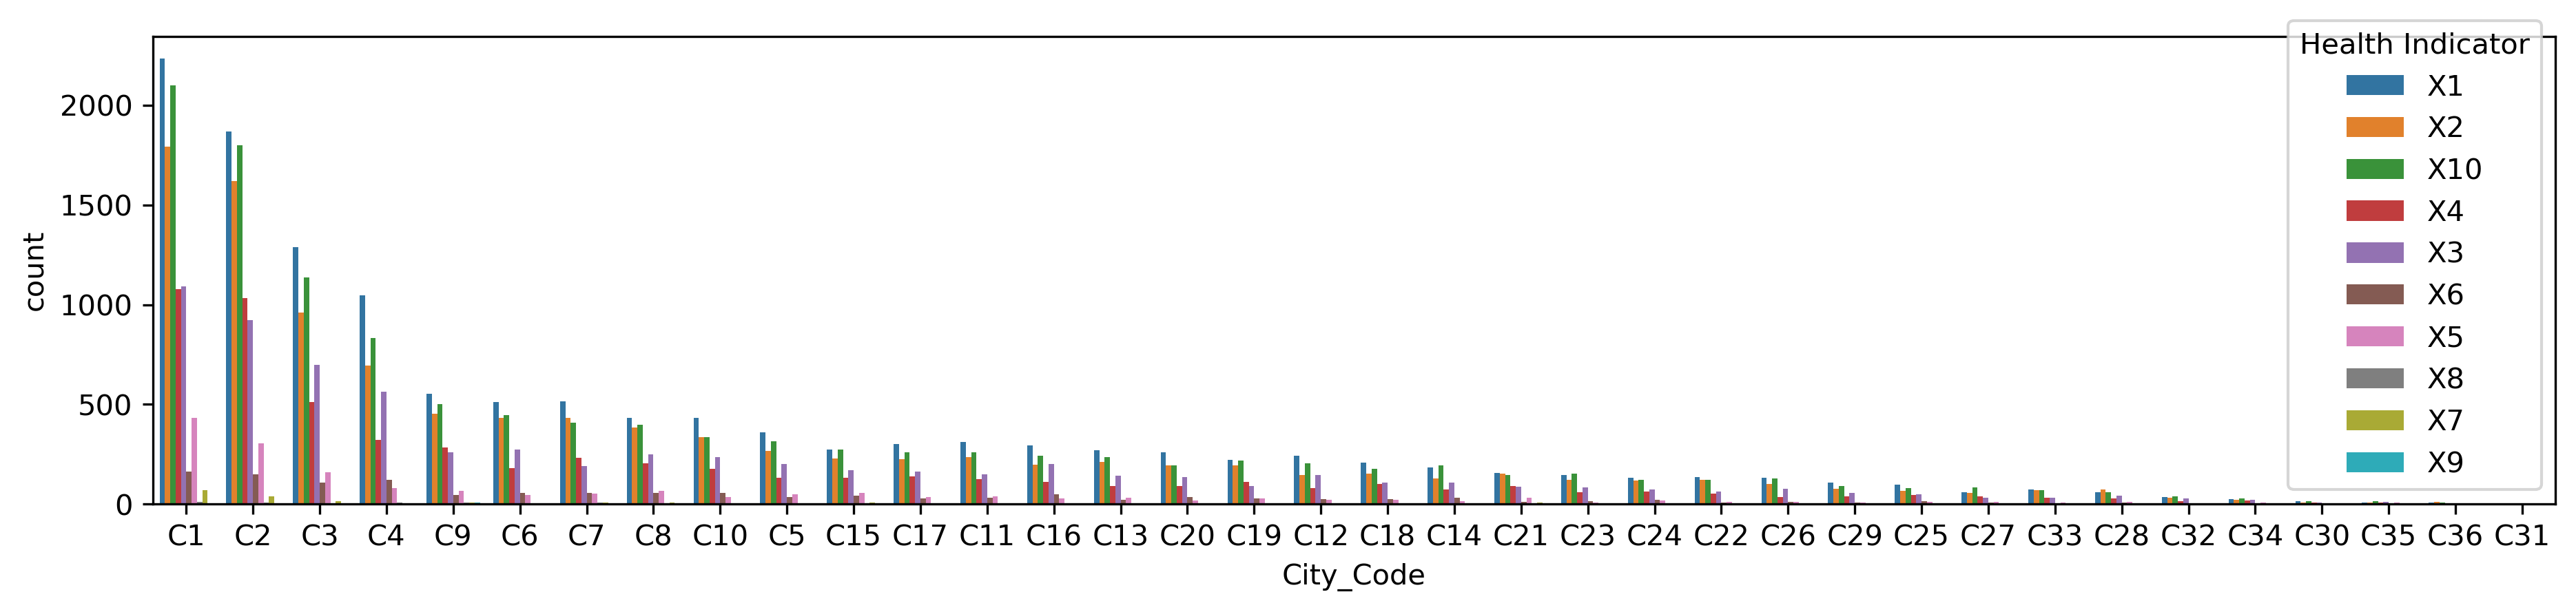

In [30]:
fig,ax = plt.subplots(figsize= (15,3), dpi=300)

ax = sns.countplot('City_Code', data = df1, hue= 'Health Indicator', order = df1['City_Code'].value_counts().index)

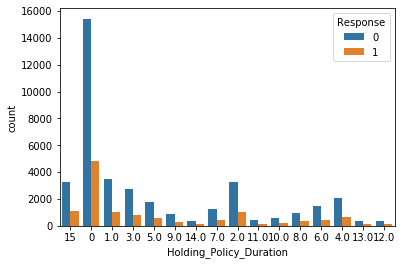

In [31]:
sns.countplot('Holding_Policy_Duration', data=df1, hue='Response')

Text(0, 0.5, 'Age')

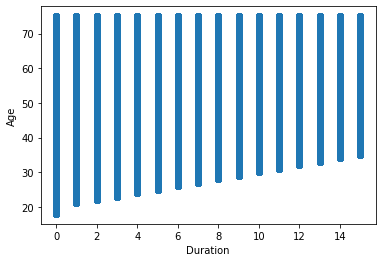

In [46]:

plt.scatter(df1['Holding_Policy_Duration'],df1['Upper_Age'])
plt.xlabel("Duration")
plt.ylabel("Age")

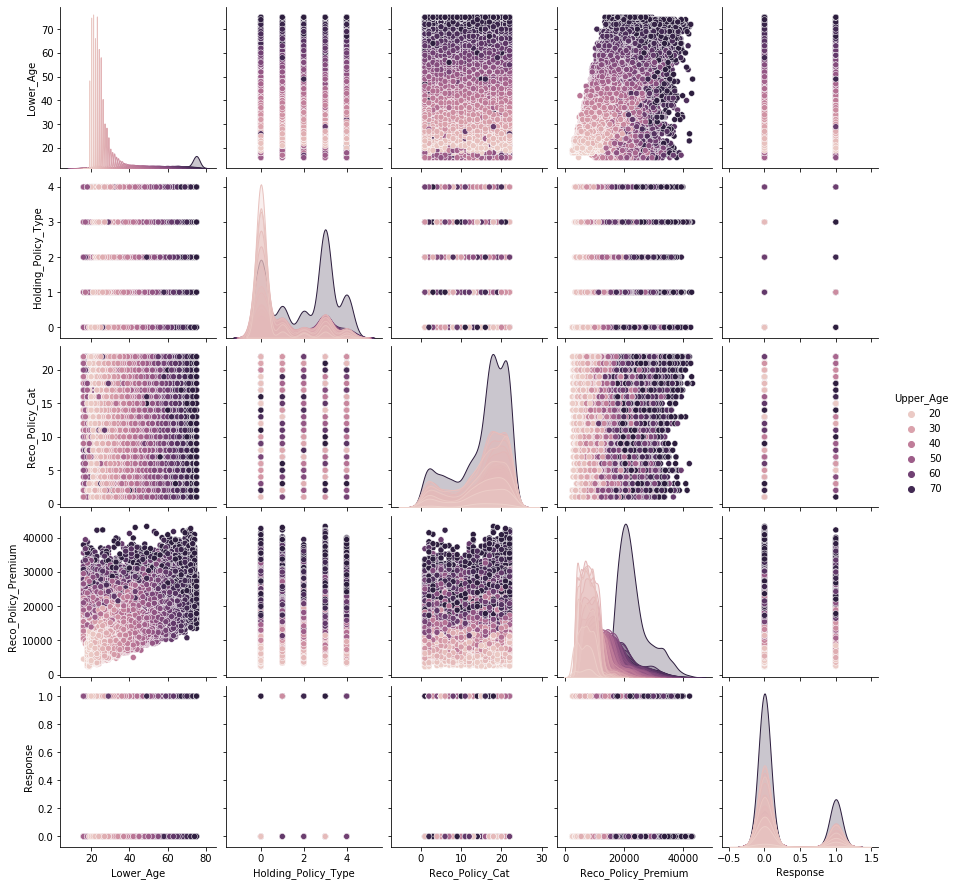

In [47]:
sns.pairplot(df1, hue='Upper_Age')

Since the data is biased towards '0', it is pretty hard to draw any inferences from pair plot.

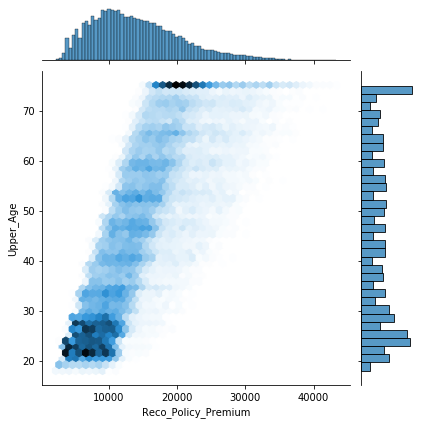

In [34]:
sns.jointplot(data = df1, x = "Reco_Policy_Premium", y= "Upper_Age", kind = "hex")

So as the age increases, recovered policy premium is also increasing highly. The highest payment recovered are always above 60. 

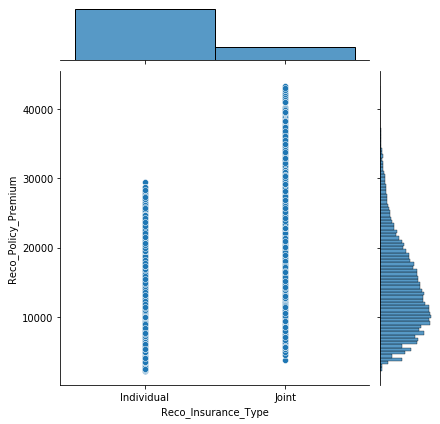

In [35]:
sns.jointplot(data=df1, x="Reco_Insurance_Type", y= "Reco_Policy_Premium")

Among insurance type, individual policies are more. But, the recovered premium is significantly high in joint accounts. 

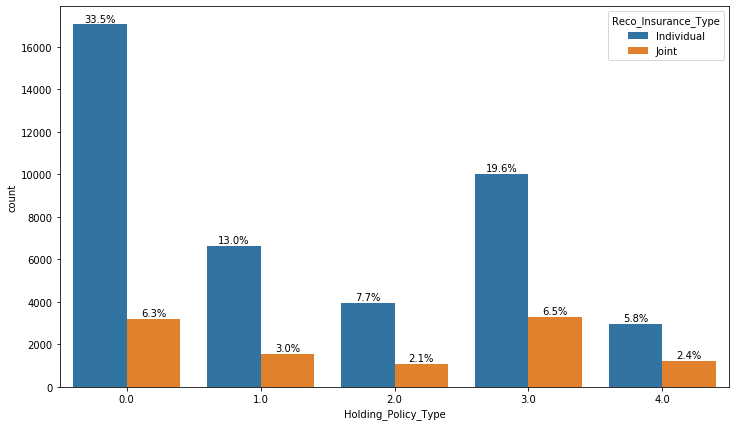

In [36]:
fig, ax = plt.subplots(figsize = (12,7))

ax = sns.countplot(data=df1, x="Holding_Policy_Type", hue= 'Reco_Insurance_Type')

total = len(df1)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

So, policy 3 is the highest holding policy for joint accounts. Since 0 means having no policy. the highest policy overall taken is also policy 3. 

# Hypothesis Testing -1

null hypothesis: The highest policy taken is policy 0


Since the 20000+ data is null and is been replaced by zero. obviously it will be more as shown in the below figure. 

Alternate hypothesis is true. but we do not have any evidence to prove it. 

So, type-2 error.